<a href="https://colab.research.google.com/github/AnnSenina/python_hse_2024/blob/main/notebooks/11_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в линейную регрессию

Поиск уравнения. Прогнозы

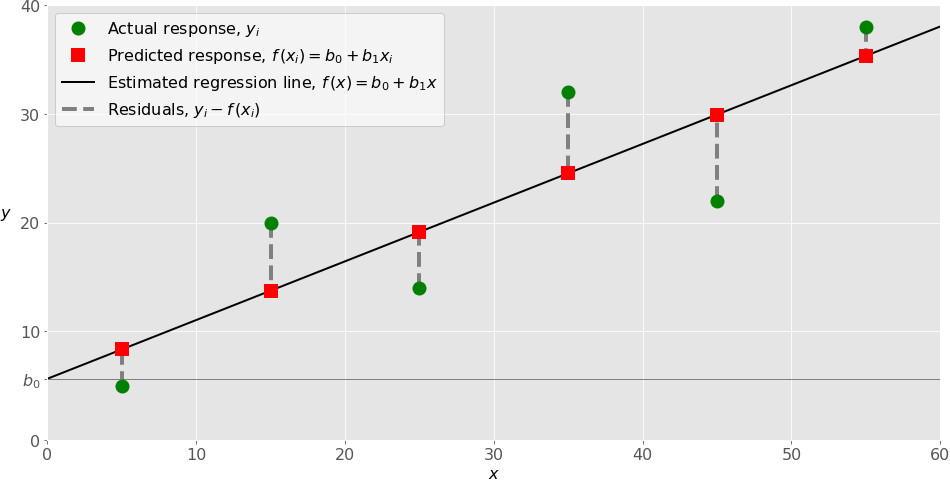

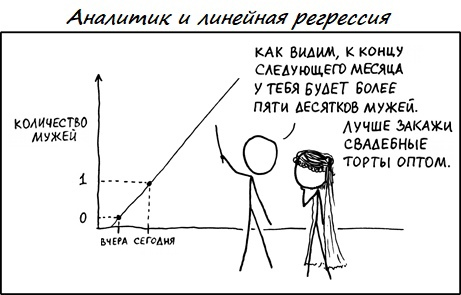

In [1]:
# библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/WHR2023.csv')
df

In [ ]:
df.info()

In [4]:
df = df.dropna()

In [ ]:
df_num = df.select_dtypes(include=[np.number])
df_num

In [ ]:
df_num.corr(method='spearman')

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df_num.corr(method='spearman'), annot = True, cmap='RdYlGn');

Давайте предсказывать количество уровень счастья

y = Ladder score

x = лучше взять что-то, что коррелирует с y (например, Social support)

In [ ]:
plt.scatter(df_num['Ladder score'], df_num["Social support"]);

## 1 способ

[Документация](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [ ]:
# функция линейной регрессии Y = a + bX

x = df_num['Social support']
y = df_num['Ladder score']
res = scipy.stats.linregress(x, y)
print(res)

print(round(res.rvalue**2, 2), '% верно предсказанных решений, коэффициент детерминации ')

In [ ]:
# функция линейной регрессии Y = a + bX

plt.plot(x, y, 'o', label='оригинальные данные')
plt.plot(x, res.intercept + res.slope*x, 'r', label='линия регрессии')
plt.legend();
# intercept - число, которое мы прибавляем в уравнении
# slope - коэффициент для х

## 2 способ

[Документация](https://scikit-learn.org/stable/modules/linear_model.html)

In [11]:
x = df_num[['Social support']]
y = df_num['Ladder score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
# 70% данных - для обучения (train - тренировочные данные)
# 30% данных - для проверки, насколько модель точна (test - тестовые данные)
# random_state - восропроизводимость результата

In [ ]:
model = LinearRegression().fit(x_train, y_train)
print(model.intercept_) # sklearn тоже сам найдет коэффициенты, но в отличие от прошлого способа - здесь заложена вероятность (random_state)
print(model.coef_)

In [13]:
y_pred = model.predict(x_test)

In [ ]:
df_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_reg

In [ ]:
((df_reg['Actual'] - df_reg['Predicted'])**2).mean() # средняя квадратичная ошибка
# стандартная = среднеквадратичная
# но! если выбросы - ошибка сильно вырастет -> используют среднюю абсолютную ошибку

# здесь мы посчитали вручную, но есть готовые метрики sklean

In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred) # средняя разница по модулю между реальными и предсказанными значениями
meanSqErr = metrics.mean_squared_error(y_test, y_pred) # средний квадрат разницы между реальными и предсказанными значениями
r2 = metrics.r2_score(y_test, y_pred)
print('R squared:', r2) # процент значений, который можно описать нашим уравнением регрессии
print('Mean Absolute Error:', meanAbErr) # здесь и далее - разные способы подсчета ошибок (чем ближе к 0, тем лучше!)
print('Mean Square Error:', meanSqErr)

Документация по метрикам: https://scikit-learn.org/stable/modules/model_evaluation.html

## Множественная линейная регрессия

Отличается тем, что в качестве x мы передаем не один столбец, а несколько

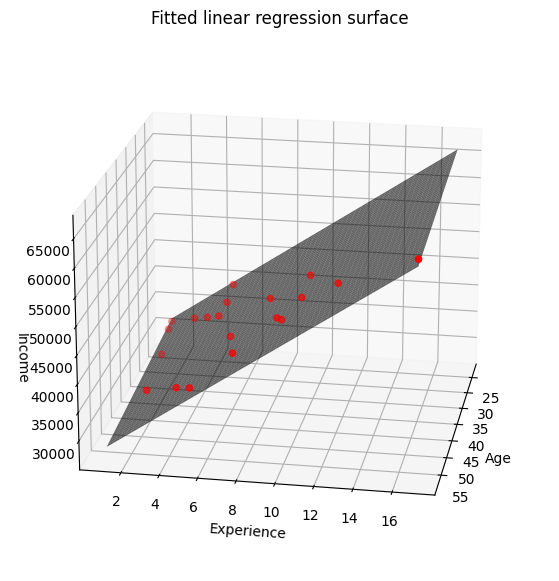

In [34]:
x = df_num[['Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']] # добавили показатели
y = df_num['Ladder score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
model = LinearRegression().fit(x_train, y_train)
print(model.intercept_) # константа, которую мы прибавляем: y = a + bx -> a
print(model.coef_) # то, что мы домножаем на каждый x, вклад каждого показателя
# чем это число больше, тем значительнее переменная влияет на y

In [36]:
y_pred = model.predict(x_test)

In [ ]:
df_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_reg

In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred) # средняя разница по модулю между реальными и предсказанными значениями
meanSqErr = metrics.mean_squared_error(y_test, y_pred) # средний квадрат разницы между реальными и предсказанными значениями
r2 = metrics.r2_score(y_test, y_pred)
print('R squared:', r2) # процент значений, который можно описать нашим уравнением регрессии
print('Mean Absolute Error:', meanAbErr) # здесь и далее - разные способы подсчета ошибок (чем ближе к 0, тем лучше!)
print('Mean Square Error:', meanSqErr)

Стало лучше! Но...

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df_num[['Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].corr(method='spearman'), annot = True, cmap='RdYlGn', center=0);

# мультиколлинеарность = показатели перекоррелированы между собой
# недостоверно: завышенные метрики качества, непредсказуемый результат на новых данных

# выход:
# не включать слишком перекоррелированные / преобразование переменных / регуляризация

В наших данных присутсвует мультиколлинеарность: наличие линейной зависимости между объясняющими переменными (факторами) регрессионной модели.

Другими словами, x не являются независимыми переменными, между ними высокие коэффициенты корреляции, они созависимы

Вернитесь на шаг назад: оставим показатель, наиболее сильно коррелирующий с Ladder score, а затем отберем только такие показатели, которые не слишком сильно коррелируют с ним (менее чем на 0,7-0,8)

### Бонусы))

In [23]:
import plotly.express as px

In [ ]:
fig = px.choropleth(df, locations="Country name", locationmode='country names',
                    color="Ladder score", hover_name="Country name",
                    title="World Happiness Report: Ladder score by country")
fig.show()

In [25]:
import matplotlib.gridspec as gs
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]

df2=df[['Ladder score',
        'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
cols=df2.corr()['Ladder score'].sort_values(ascending=False)

In [26]:
def country_comp1(country1, country2):
    df4=df[df['Country name'].isin([country1, country2])]
    df4=df4[cols.index].T
    df4.columns=[country1,country2]
    print(df4)
    fig = plt.figure(figsize=(15,10))
    plt.suptitle("Comparison {} and {}".format(country1, country2),family='Serif', weight='bold', size=20)
    g=gs.GridSpec(nrows=1, ncols=2, wspace=0)
    ax1=plt.subplot(g[0,0])
    for s in ['left','right','top','bottom']:
        ax1.spines[s].set_visible(False)

    #ax1.set_xlim(xmin=0)
    ax1=sns.barplot(data=df4,y=df4.index,x=country1, color=color[-1]).invert_xaxis()

    ax2=plt.subplot(g[0,1], sharey=ax1)
    ax2=sns.barplot(data=df4,y=df4.index,x=country2, color=color[-2])
    #ax2.set_xlim(xmin=0)
    ax2.yaxis.tick_right()
    for s in ['left','right','top','bottom']:
        ax2.spines[s].set_visible(False)
    return

In [ ]:
country_comp1('Finland','India')

Например, отсюда: https://www.kaggle.com/code/gcmadhan/world-happiness-index-report

Можете в целом поискать World Happiness Index Report за разные годы - горячо любимый датасет на Kaggle, миллион визуализаций, вариантов реализации анализа данных и т.д.

# Задание

Загрузите набор данных sandler.csv - набор данных для предсказания дохода от показа фильмов.

Столбцы Date - дата премьеры, Title - название, Genre - жанр, Studio - студия Theaters - число кинотеатров, Opening Gross - доход от премьеры, Opening Theaters - число кинотеатров для премьеры, Gross - общий доход

В качестве х возьмите: Theaters /	Opening / Opening Theaters

В качестве y - Gross

**Постройте линейную регрессию для этих данных, постарайтесь получить высокий R squared и низкие ошибки (посоревнуемся, получит наибольший возможный R squared))**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/sandler.csv')
df

In [29]:
# сделайте предобработку - она уже прописана
df['Opening Theaters']=df['Opening Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Theaters']=df['Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Gross']=df['Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Opening Gross']=df['Opening Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df.drop(['Date','Title', 'Genre', 'Studio'], axis=1, inplace=True)
df['Opening Theaters'] = pd.to_numeric( df['Opening Theaters'])
df['Theaters'] = pd.to_numeric( df['Theaters'])
df['Gross'] = pd.to_numeric( df['Gross'])
df['Opening Gross'] = pd.to_numeric( df['Opening Gross'])
# обучите модель на x, y
# сделайте предсказание

In [ ]:
df

In [31]:
y = df['Gross']
# при выборе x: помните о мультиколлинераности = х не должны сильно (0.7+) коррелировать между собой
# пытаемся прийти к наиболее высокому r**2